In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('./')
import json
import os
from qiskit import QuantumCircuit
import numpy as np
from dataclasses import dataclass
from enum import auto, Enum
import matplotlib.pyplot as plt
import math
from dataclasses import dataclass
from component.sup_sys.algorithm_loader import load_algorithms
from component.a_backend.fake_backend import *
from component.sup_sys.backend_loader import load_backends
from qiskit.visualization import plot_error_map

@dataclass
class ResultOfSchedule:
    numcircuit: int
    nameAlgorithm: str
    averageQubits: float
    nameSchedule: str
    typeMachine: dict
    
    # Metrics
    average_turnaroundTime: float
    average_responseTime: float
    average_fidelity: float
    sampling_overhead: float
    average_throughput: float
    average_utilization: float
    scheduler_latency: float
    makespan: float
    
result_Schedule = ResultOfSchedule(
    numcircuit=0,
    nameAlgorithm="",
    averageQubits=0.0,
    nameSchedule="",
    typeMachine={},
    
    # Metrics
    average_turnaroundTime=0.0,
    average_responseTime=0.0,
    average_fidelity=0.0,
    sampling_overhead=0.0,
    average_throughput=0.0,
    average_utilization=0.0,
    scheduler_latency=0.0,
    makespan=0.0
)

load_algorithms()
result_Schedule.nameSchedule = "FFD"


backendlist = load_backends()
print(len(backendlist))
print(backendlist)

machines = {}
backend0 = FakeBelemV2()
backend1 = FakeManilaV2()

machines[backend0.name] = backend0
machines[backend1.name] = backend1
print(machines)
# plot_error_map(list(machines.values())[0], figsize=(10, 8))

58
{'FakeAlgiers': 27, 'FakeAlmadenV2': 20, 'FakeArmonkV2': 1, 'FakeAthensV2': 5, 'FakeAuckland': 27, 'FakeBelemV2': 5, 'FakeBoeblingenV2': 20, 'FakeBogotaV2': 5, 'FakeBrisbane': 127, 'FakeBrooklynV2': 65, 'FakeBurlingtonV2': 5, 'FakeCairoV2': 27, 'FakeCambridgeV2': 28, 'FakeCasablancaV2': 7, 'FakeCusco': 127, 'FakeEssexV2': 5, 'FakeFractionalBackend': 5, 'FakeGeneva': 27, 'FakeGuadalupeV2': 16, 'FakeHanoiV2': 27, 'FakeJakartaV2': 7, 'FakeJohannesburgV2': 20, 'FakeKawasaki': 127, 'FakeKolkataV2': 27, 'FakeKyiv': 127, 'FakeKyoto': 127, 'FakeLagosV2': 7, 'FakeLimaV2': 5, 'FakeLondonV2': 5, 'FakeManhattanV2': 65, 'FakeManilaV2': 5, 'FakeMarrakesh': 156, 'FakeMelbourneV2': 15, 'FakeMontrealV2': 27, 'FakeMumbaiV2': 27, 'FakeNairobiV2': 7, 'FakeOsaka': 127, 'FakeOslo': 7, 'FakeOurenseV2': 5, 'FakeParisV2': 27, 'FakePeekskill': 27, 'FakePerth': 7, 'FakePoughkeepsieV2': 20, 'FakePrague': 33, 'FakeQuebec': 127, 'FakeQuitoV2': 5, 'FakeRochesterV2': 53, 'FakeRomeV2': 5, 'FakeSantiagoV2': 5, 'Fake

In [2]:
from component.b_benchmark.mqt_tool import benchmark_circuit, create_circuit
from component.sup_sys.job_info import JobInfo

# initialize the number of qubits and jobs
num_qubits_per_job = 4
num_jobs = 2
jobs = {}   

for i in range(num_jobs):
    job_id = str(i + 1)
    jobs[job_id] = num_qubits_per_job

# update to result_Schedule
result_Schedule.numcircuit = len(jobs)
result_Schedule.averageQubits = sum(jobs.values()) / len(jobs)

# generate circuits and job information
origin_job_info = {}

for job_name, num_qubits in jobs.items():
    circuit = create_circuit(num_qubits, job_name)
    result_Schedule.nameAlgorithm = "ghz"
    circuit.remove_final_measurements()
    origin_job_info[job_name] = JobInfo(
        job_name=job_name,
        qubits=circuit.num_qubits,
        machine=None,  # Placeholder for machine name
        capacity_machine=0,  # Placeholder for machine capacity
        start_time=0.0,  # Placeholder for start time
        duration=0.0,  # Placeholder for duration
        end_time=0.0,  # Placeholder for end time
        childrenJobs=None,  # Placeholder for child jobs
        circuit=circuit,
        result_cut=None,  # Placeholder for result cut
    )

# for job in origin_job_info.values():
#     job.print()
    
process_job_info = origin_job_info.copy()

In [3]:
print(process_job_info)

{'1': JobInfo(job_id='4b07ef04-81ac-4f4c-835e-1b71691f58b7', job_name='1', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7c31066a60e0>, qubits=4, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, knitted_circuit=None, transpiled_circuit_measured=None, fidelity=None), '2': JobInfo(job_id='4b07ef04-81ac-4f4c-835e-1b71691f58b7', job_name='2', circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7c3106671720>, qubits=4, machine=None, capacity_machine=0, start_time=0.0, duration=0.0, end_time=0.0, childrenJobs=None, result_cut=None, transpiled_circuit=None, knitted_circuit=None, transpiled_circuit_measured=None, fidelity=None)}


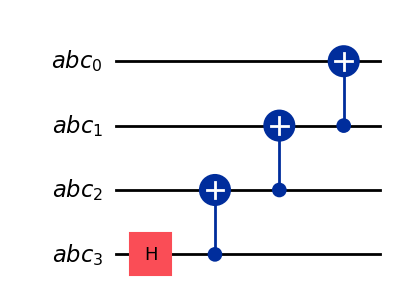

In [4]:
process_job_info["1"].circuit.draw("mpl")

In [5]:
process_job_info["1"].circuit.data

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'abc'), 3),), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'abc'), 3), Qubit(QuantumRegister(4, 'abc'), 2)), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'abc'), 2), Qubit(QuantumRegister(4, 'abc'), 1)), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'abc'), 1), Qubit(QuantumRegister(4, 'abc'), 0)), clbits=())]

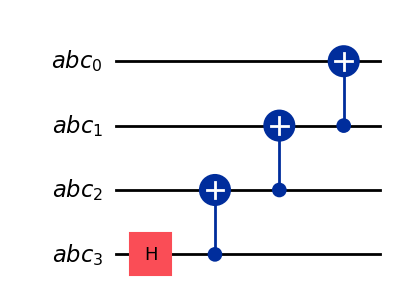

In [6]:
process_job_info["2"].circuit.draw("mpl")

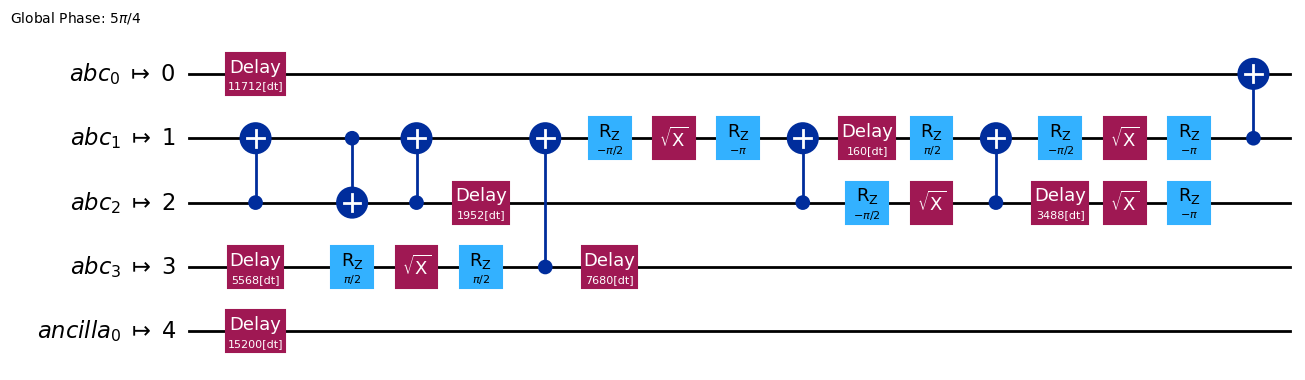

In [7]:
from qiskit import QuantumCircuit, transpile
# Transpile circuits for all scheduled jobs
# for job_id, job in scheduler_job.items():
#     backend = machines.get(job.machine)
#     if backend:
#         # Perform transpilation
#         # job.transpiled_circuit = transpile(job.knitted_circuit, backend, scheduling_method='alap', layout_method='trivial')
#         job.transpiled_circuit_measured = transpile(job.knitted_circuit, backend, scheduling_method='alap', layout_method='trivial')
#     else:
#         print(f"No backend found for machine {job.machine}. Skipping job {job_id}.")
#     job.print()

transpile1 = transpile(process_job_info["1"].circuit, backend0, scheduling_method='alap', layout_method='trivial')
transpile1.draw("mpl")

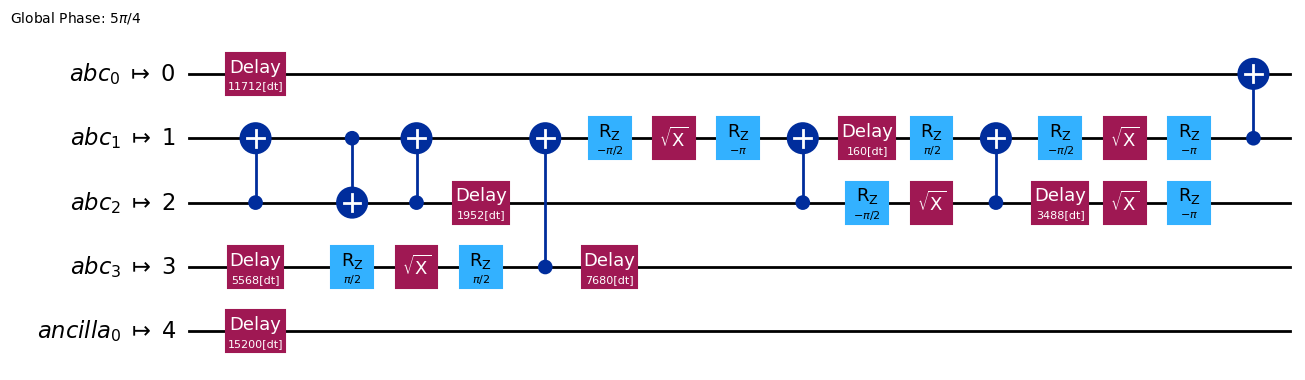

In [8]:
from qiskit import QuantumCircuit, transpile
# Transpile circuits for all scheduled jobs
# for job_id, job in scheduler_job.items():
#     backend = machines.get(job.machine)
#     if backend:
#         # Perform transpilation
#         # job.transpiled_circuit = transpile(job.knitted_circuit, backend, scheduling_method='alap', layout_method='trivial')
#         job.transpiled_circuit_measured = transpile(job.knitted_circuit, backend, scheduling_method='alap', layout_method='trivial')
#     else:
#         print(f"No backend found for machine {job.machine}. Skipping job {job_id}.")
#     job.print()

transpile2 = transpile(process_job_info["2"].circuit, backend0, scheduling_method='alap', layout_method='trivial')
transpile2.draw("mpl")